In [20]:
import pandas as pd
import matplotlib.gridspec as gridspec
from imblearn.over_sampling import SMOTE 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,accuracy_score, roc_curve, precision_score
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, f1_score, precision_recall_curve
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from google.colab import files
uploaded = files.upload()

In [21]:
ccd = pd.read_csv('creditcarddataset.csv')

In [22]:
ccd[['Amount', 'Time']].describe()
#Mean amount is around 88 and standard deviation is around 250. 
#The max amount for a transation was 25, 691.16 and min amount was zero.
#However, the median is only 22, which is a around a quarter of the mean. 
#This signifies that there are outliers and our data is highly skewed, which is affecting the amount and mean.

,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


In [23]:
summaryoffraud = (ccd[ccd['Class'] == 1].describe().transpose().reset_index())

summaryoffraud = summaryoffraud.rename(columns = {"index" : "features"})
summaryoffraud = np.around(summaryoffraud, 3)
summaryoffraud

#Descriptive Stats Fraud Transactions

,features,count,mean,std,min,25%,50%,75%,max
0,Time,492.0,80746.807,47835.365,406.000,41241.500,75568.500,128483.000,170348.000
1,V1,492.0,-4.772,6.784,-30.552,-6.036,-2.342,-0.419,2.132
2,V2,492.0,3.624,4.291,-8.402,1.188,2.718,4.971,22.058
3,V3,492.0,-7.033,7.111,-31.104,-8.643,-5.075,-2.276,2.250
4,V4,492.0,4.542,2.873,-1.313,2.373,4.177,6.349,12.115
5,V5,492.0,-3.151,5.372,-22.106,-4.793,-1.523,0.215,11.095
6,V6,492.0,-1.398,1.858,-6.406,-2.502,-1.425,-0.413,6.474
7,V7,492.0,-5.569,7.207,-43.557,-7.965,-3.034,-0.946,5.803
8,V8,492.0,0.571,6.798,-41.044,-0.195,0.622,1.765,20.007
9,V9,492.0,-2.581,2.501,-13.434,-3.872,-2.209,-0.788,3.354


In [24]:
summaryofnonfraud = (ccd[ccd['Class'] == 0].describe().transpose().reset_index())

summaryofnonfraud = summaryofnonfraud.rename(columns = {"index" : "features"})
summaryofnonfraud = np.around(summaryofnonfraud, 3)
summaryofnonfraud

#Descriptive Stats of Non-Fraud Transactions
#The Dataset has 492 Frauds out of 284,315 transactions. It is highly unbalanced, with only 0.173% of transactions being fraudulent.

,features,count,mean,std,min,25%,50%,75%,max
0,Time,284315.0,94838.202,47484.016,0.000,54230.000,84711.000,139333.000,172792.000
1,V1,284315.0,0.008,1.930,-56.408,-0.918,0.020,1.316,2.455
2,V2,284315.0,-0.006,1.636,-72.716,-0.599,0.064,0.800,18.902
3,V3,284315.0,0.012,1.459,-48.326,-0.885,0.182,1.028,9.383
4,V4,284315.0,-0.008,1.399,-5.683,-0.850,-0.022,0.738,16.875
5,V5,284315.0,0.005,1.357,-113.743,-0.689,-0.053,0.612,34.802
6,V6,284315.0,0.002,1.330,-26.161,-0.767,-0.273,0.400,73.302
7,V7,284315.0,0.010,1.179,-31.765,-0.551,0.041,0.571,120.589
8,V8,284315.0,-0.001,1.161,-73.217,-0.209,0.022,0.326,18.709
9,V9,284315.0,0.004,1.089,-6.291,-0.640,-0.050,0.598,15.595


In [25]:
ccd[(ccd['Class'] == 1)]['Amount'].value_counts().head(10)
#This shows that 113 of the fraudulent transactions are one dollar, 27 are 99.99 dollars and 27 are zero. 
#The zero could be due an account verification method that credit cards used to verify a cardholders information without charging the customer.

1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
1.10       3
2.28       3
Name: Amount, dtype: int64

In [26]:
Q3 = np.percentile(ccd['Amount'], 75)
Q1 = np.percentile(ccd['Amount'], 25)

# setting the cutoff
cutoff = 5.0

# computing the interquartile range
IQR = (Q3 - Q1)

# computing lower bound and upper bound
lower_bound = Q1 - (IQR * cutoff)
upper_bound = Q3 + (IQR * cutoff)

# creating a filter to remove values less than lower bound and greater than
# upper bound
filter_data = (ccd['Amount'] < lower_bound) | (ccd['Amount'] > upper_bound)

# filtering data
outliers = ccd[filter_data]['Amount']
fraud_outliers = ccd[(ccd['Class'] == 1) & filter_data]['Amount']
nonfraud_outliers = ccd[(ccd['Class'] == 0) & filter_data]['Amount']

print(f"Total Number of Outliers : {outliers.count()}")
print(f"Number of Outliers in Fraudulent Class : {fraud_outliers.count()}")
print(f"No of Outliers in Normal Class : {nonfraud_outliers.count()}")
print(f"Percentage of Fraud amount outliers : {round((fraud_outliers.count()/outliers.count())*100,2)}%")


Total Number of Outliers : 11366
Number of Outliers in Fraudulent Class : 41
No of Outliers in Normal Class : 11325
Percentage of Fraud amount outliers : 0.36%


In [27]:
ccd_data = ccd.drop(outliers.index)
ccd_data.reset_index(inplace=True, drop=True)

In [28]:
ccd_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
ccd_data['Amount'] = np.log(ccd_data['Amount'] +0.001)

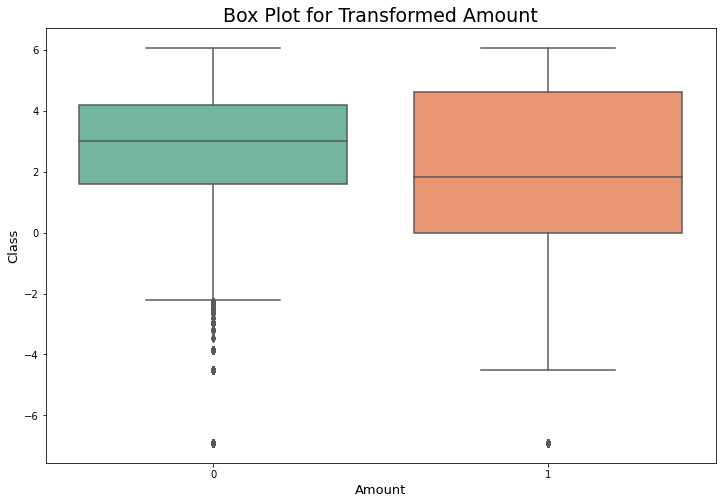

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = "Class", y = "Amount", data= ccd_data, palette = 'Set2');
plt.xlabel("Amount", fontsize = 13)
plt.ylabel("Class", fontsize = 13)
plt.title("Box Plot for Transformed Amount", fontsize = 19) ;

In [30]:
robust_scaler = RobustScaler()
ccd_data['Time'] = robust_scaler.fit_transform(ccd_data['Time'].values.reshape(-1,1))

In [30]:
X = ccd_data.drop(['Class','hours','mins'], 1)
Y = ccd_data.Class

In [ ]:
from collections import Counter
print(f'Original dataset shape : {Counter(Y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, Y)

print(f'Resampled dataset shape {Counter(y_res)}')

In [ ]:
X_sample = X_res.sample(5000, random_state=42)
y_sample = y_res.sample(5000, random_state=42)

print(X_sample.shape)
print(y_sample.shape)

In [ ]:
strat = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)